In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
import os
import random
from functools import partial

In [3]:
# creating random function
random.seed(os.urandom(1))
rand = partial(random.randint, 1, 100)
rand()

84

In [4]:
# creating inputs 
# result = w1*input1 + w2*input2 + b

input1 = [rand() for i in range(100)]
input2 = [rand() for i in range(100)]
result = [6 * input1[i] + 13 * input2[i] + 5 for i in range(100)] # w1 = 6; w2=13; b=5

In [5]:
# creating dataframes from input1, input2 and output

df = pd.DataFrame({"input1":input1, "input2":input2, "result":result})
df.tail()

,input1,input2,result
95,61,15,566
96,84,73,1458
97,3,78,1037
98,95,70,1485
99,62,53,1066


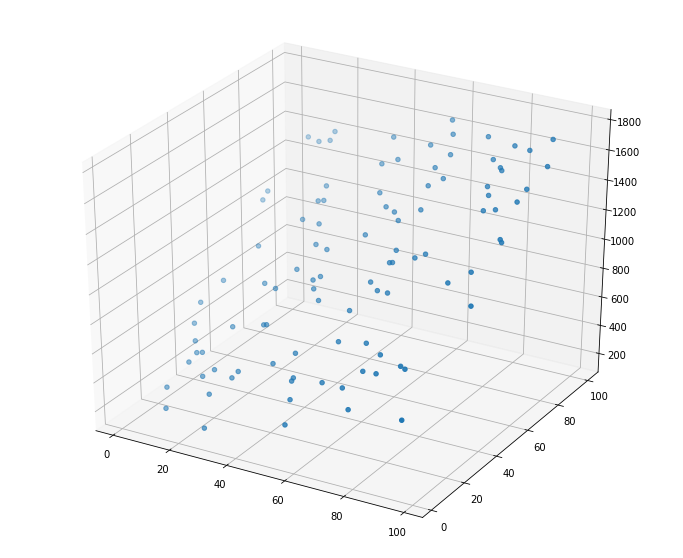

In [6]:
import mpl_toolkits.mplot3d
%matplotlib inline

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=input1, ys=input2, zs=result)


In [7]:
## creating tensors from input1, input2 and result

input = torch.tensor([
                        [*input1],
                        [*input2]
                    ],
        dtype=torch.float32)
input = input.t()

target = torch.tensor(result, dtype=torch.float32)
target = torch.reshape(target,(100,1))


In [8]:
## importing torch and requirements

import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F
from torch import nn


In [9]:
## creating dataset and dataloader

dataset = TensorDataset(input, target)
batch_size = 5
train_dl = DataLoader(dataset, batch_size=batch_size)

# looking at first batch of data
for xb, yb in train_dl:
    print("First batch of input:\n ", xb)
    print("First batch of output:\n ", yb)
    break;


First batch of input:
  tensor([[23., 13.],
        [30., 53.],
        [20., 21.],
        [54., 92.],
        [56.,  2.]])
First batch of output:
  tensor([[ 312.],
        [ 874.],
        [ 398.],
        [1525.],
        [ 367.]])


In [10]:
# define a model

m = nn.Linear(2,1)
print(list(m.parameters()))

# Optimizer
opt = torch.optim.SGD(m.parameters(), lr=0.00015)
opt

[Parameter containing:
tensor([[-0.5176, -0.5317]], requires_grad=True), Parameter containing:
tensor([0.6389], requires_grad=True)]


SGD (
Parameter Group 0
    dampening: 0
    lr: 0.00015
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [11]:
# calculate loss and prediction

preds = m(input)
loss = F.mse_loss(preds, target)
loss

tensor(1293124.2500, grad_fn=<MseLossBackward>)

In [12]:
def fit(num_epochs, model, loss_fn, opt, train_dl):
    for epoch in range(num_epochs):
        
        epoch_loss = 0
        #for each batch
        for xb,yb in train_dl:
            
            #generate prediction
            preds = model(xb)
            
            #calcualate loss
            loss = loss_fn(preds, yb)
            
            #compute gradient
            loss.backward()
            
            #update weight and biases
            opt.step()
            
            #zeros out gradients
            opt.zero_grad()
            
            #accumulate loss in epoch loss
            epoch_loss += loss.detach()
        
        if (epoch + 1) % (num_epochs / 10) == 0:
            print("Epoch: {:6d} Loss: {}".format(epoch+1, epoch_loss/len(train_dl.dataset)))
        

In [13]:
fit(10000, m, F.mse_loss, opt, train_dl)
print(*m.parameters())

Epoch:   1000 Loss: 0.38180652260780334
Epoch:   2000 Loss: 0.070557601749897
Epoch:   3000 Loss: 0.013053573668003082
Epoch:   4000 Loss: 0.00241178460419178
Epoch:   5000 Loss: 0.00044607146992348135
Epoch:   6000 Loss: 8.175692346412688e-05
Epoch:   7000 Loss: 1.464003617002163e-05
Epoch:   8000 Loss: 3.4180918646598e-06
Epoch:   9000 Loss: 8.246871061601269e-07
Epoch:  10000 Loss: 3.6510871836981096e-07
Parameter containing:
tensor([[ 6.0000, 13.0000]], requires_grad=True) Parameter containing:
tensor([4.9984], requires_grad=True)


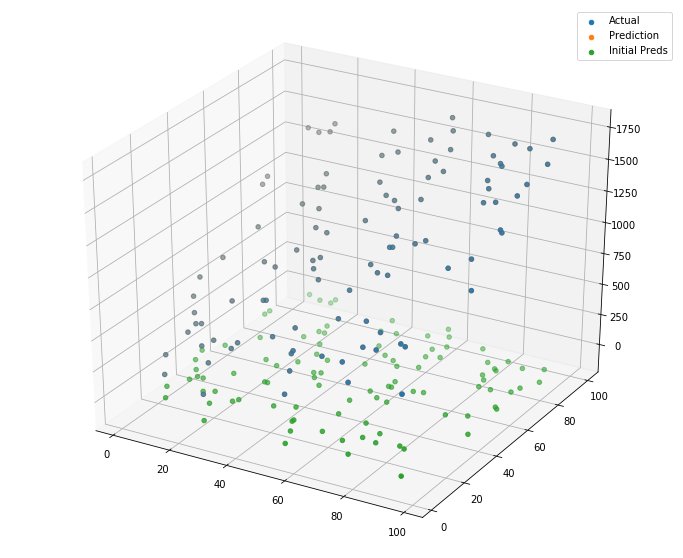

In [30]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

#plotting Actual prediction (True value)
ax.scatter(xs=input1, ys=input2, zs=result, label="Actual")

#plottin prediction after Training.
ax.scatter(xs=input1, ys=input2, zs=m(input).detach()[:,0], label="Prediction")

#calculating initial prediction (Without training).
initial_w = torch.tensor([[-0.5176, -0.5317]])
initial_b = torch.tensor([0.6389])
initial_preds = input @ initial_w.t() + initial_b

#plotting initial prediction
ax.scatter(xs=input1, ys=input2, zs=initial_preds[:,0], label="Initial Preds")
ax.legend()

# As you can see, Prediction overlaps actual dots due to accuracy of model

In [33]:
[*m.parameters()]

[Parameter containing:
 tensor([[ 6.0000, 13.0000]], requires_grad=True),
 Parameter containing:
 tensor([4.9984], requires_grad=True)]